In [62]:
teamNames = [
    'Astralis',
    'Liquid',
    'Natus Vincere',
    'Faze',
    'ENCE',
    'Renegades',
    'MIBR',
    'NiP',
    'Vitality',
    'fnatic',
    'NRG',
    'North',
    'G2',
    'AVANGAR',
    'Windigo',
    'FURIA',
    'Valiance',
    'Heroic',
    'BIG',
    'forZe',
    'mousesports'
]


In [63]:
teamCountries = [
    'Denmark',
    'USA',
    'Russia',
    'International',
    'Finland',
    'Australia',
    'Brazil',
    'Sweden',
    'France',
    'Sweden',
    'USA',
    'Denmark',
    'France',
    'Kazakhstan',
    'Bulgaria',
    'Brazil',
    'International',
    'Denmark',
    'Germany',
    'Russia',
    'International'
]

In [65]:
len(teamURLs)

21

In [66]:
teamURLs = [
    'https://www.hltv.org/results?team=6665',
    'https://www.hltv.org/results?team=5973',
    'https://www.hltv.org/results?team=4608',
    'https://www.hltv.org/results?team=6667',
    'https://www.hltv.org/results?team=4869',
    'https://www.hltv.org/results?team=6211',
    'https://www.hltv.org/results?team=9215',
    'https://www.hltv.org/results?team=4411',
    'https://www.hltv.org/results?team=9565',
    'https://www.hltv.org/results?team=4991',
    'https://www.hltv.org/results?team=6673',
    'https://www.hltv.org/results?team=7533',
    'https://www.hltv.org/results?team=5995',
    'https://www.hltv.org/results?team=8120',
    'https://www.hltv.org/results?team=8513',
    'https://www.hltv.org/results?team=8297',
    'https://www.hltv.org/results?team=8481',
    'https://www.hltv.org/results?team=7175',
    'https://www.hltv.org/results?team=7532',
    'https://www.hltv.org/results?team=8135',
    'https://www.hltv.org/results?team=4494'
]

In [67]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
headers = {'User-Agent': user_agent}

In [123]:
colors=[
    'red',
    'blue', 
    'yellow', 
    'navy', 
    'green', 
    'pink', 
    'orange', 
    'brown', 
    'purple', 
    'brown', 
    'blue', 
    'red', 
    'purple', 
    'magenta',
    'aqua', 
    'orange', 
    'navy', 
    'red', 
    'turquoise', 
    'yellow', 
    'navy'
       ]


In [68]:
def getTeamStats(url):
    
     #Create a handle, page, to handle the contents of the website
    page = requests.get(url,headers=headers)
    
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')

    tr_elements = doc.xpath('//tr')
    
    
    #header list
    names = ['Team', 'Score', 'Oponent', 'Tournament', 'Map']
    #Create empty list
    col=[]
    i=1
    #For each row, store each first element (header) and an empty list
    for name in names:
        col.append((name,[]))
        i+= 1

    winCond = []  
    playerLabel = []
    #Since our first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]

        #If row is not of proper length, the //tr data is not from our table 
        if len(T)== len(tr_elements[1]):

            #i is the index of our column
            i=0
           
            #Iterate through each element of the row
            for t in T.iterchildren():

                data=t.text_content()
                
                html_page = data
                    
                textString = lh.tostring(t)
                textString = str(textString)
                #print(textString)

                if ("table-time datet" in textString ):
                    data = i
                elif "match-lost" in textString :
                    winCond.append(0)
                elif "match-tied" in textString:
                    winCond.append(2)

                
                
                data = str(data)
                data = data.replace('\n','')
                data = data.strip()
                #print(data)
                #print(i)


                #I put this in because for some reason some graphs have empty columns
                if data:
                    try:
                        data=int(data)
                    except:
                        pass
                    col[i][1].append(data)
                    
                    if i == 1:
                        
                        scores = []
                        split = data.split('-')
                        
                        for num in split:
                            scores.append(int(num))
                            if len(scores) == 2:
                                if scores[0] > scores[1]:
                                    winCond.append(1)
                                else:
                                    winCond.append(0)
                        #print(scores)
                #Increment i for the next column
                i+=1

    if len(winCond) != 0: 
        col.append(("Won?", winCond))
    
    #col.append(("Player Label", playerLabel))
    
    Dict={title:column for (title,column) in col}
    #print(Dict)
    """"
    for k,v in Dict.items():
        print (k, len(list(filter(None, v))))
    """
    df=pd.DataFrame(Dict)
    df.head()
    
    numpyData = df.to_numpy()
    return(numpyData)


In [138]:
def getTeamMatrix(teamURLs):
     
    count = 0
    #this gets the size of our master array
    temp = getTeamStats(teamURLs[0])
    tempSize = temp.shape
    finMatrix = np.zeros(shape=(1,tempSize[1]))
    
    for team in teamURLs:
        toAdd = getTeamStats(team)
        finMatrix = np.vstack((finMatrix, toAdd))
    
    finMatrix = np.delete(finMatrix, (0), axis=0)
    return finMatrix


In [139]:
team_matrix=getTeamMatrix(teamURLs)

In [71]:
team_matrix

array([['Astralis', '2 - 0', 'HellRaisers',
        'ESL Pro League Season 9 Europe', 'bo3', 1],
       ['Astralis', '2 - 0', 'ex-3DMAX',
        'ESL Pro League Season 9 Europe', 'bo3', 1],
       ['Astralis', '5 - 16', 'FaZe', 'BLAST Pro Series Miami 2019',
        'd2', 0],
       ...,
       ['mousesports', '2 - 0', 'Não Tem Como',
        'ESL One Belo Horizonte 2018', 'bo3', 1],
       ['mousesports', '1 - 2', 'Natus Vincere',
        'StarSeries i-League Season 5', 'bo3', 0],
       ['mousesports', '2 - 1', 'NiP', 'StarSeries i-League Season 5',
        'bo3', 1]], dtype=object)

In [72]:
def string_to_num(names):
    names_num=[]
    for name in names:
        names_num.append(''.join(str(ord(c)) for c in name))
    return names_num

In [73]:
team_matrix[:,0]=string_to_num(team_matrix[:,0])
team_matrix[:,2]=string_to_num(team_matrix[:,1])
team_matrix[:,3]=string_to_num(team_matrix[:,2])
team_matrix[:,4]=string_to_num(team_matrix[:,3])

In [74]:
X=team_matrix[:, [0,2,3,4]]
y=team_matrix[:,-1]
y=y.astype('int')

In [140]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
node_list = teamNames
edge_list=[]
for l in range(len(team_matrix)):
    edge_list.append((team_matrix[l][0], team_matrix[l][2]))

In [141]:
char_sizes = []
for n in G.nodes():
    ##get the node's degree
    deg = nx.degree(G,nbunch=n)
    ##scale the size of the node by the square root of their degree -- doubled for easier viewing 
    char_sizes.append(2 * sqrt(deg)) 

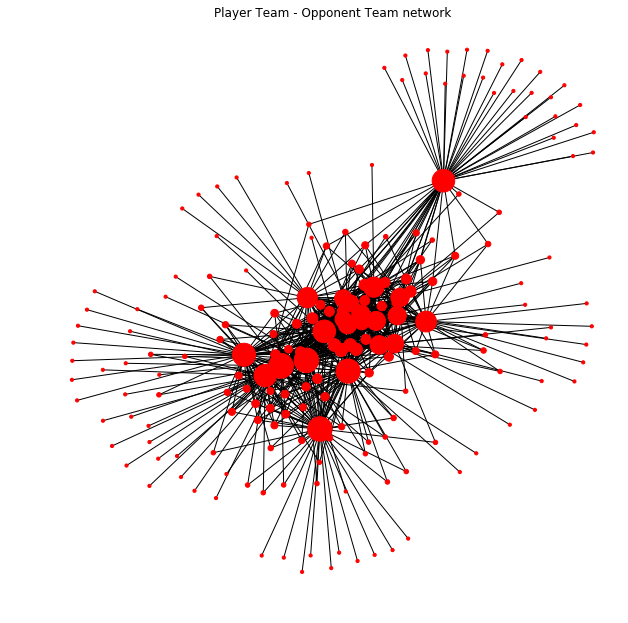

In [144]:
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)
#To remove nodes that have a degree of 0
G.remove_nodes_from(list(nx.isolates(G)))
"""
print("Graph Nodes: ")
print(G.nodes())
print("Graph Edges: ")
print(G.edges())
"""
d = dict(G.degree)
plt.figure(2,figsize=(8,8))
nx.draw(G, nodelist=d.keys(), node_size=[v * 10 for v in d.values()])
nx.spring_layout(G,k=2,iterations=100)
plt.title("Player Team - Opponent Team network")
plt.show()

In [ ]:
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

"""
print("Graph Nodes: ")
print(G.nodes())
print("Graph Edges: ")
print(G.edges())
"""
d = dict(G.degree)
plt.figure(2,figsize=(8,8))
nx.draw(G, nodelist=d.keys(), node_size=40)
nx.spring_layout(G,k=2,iterations=200)
plt.title("Player Team - Opponent Team network")
plt.show()

In [129]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 80
Number of edges: 593
Average degree:  14.8250


In [ ]:
#Average degree is the average number of connections of each node in your network. 

In [75]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
predicts=clf.predict(test_X)

In [78]:
clf.score(test_X, test_y)

0.5612244897959183